In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

C:\Users\Sahil\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# "parse_dates" parameter converts the Date column to DatetimeIndex format (string by default)

df = pd.read_csv("stock_data.csv",
                parse_dates = True,
                index_col = "Date")

df.head(10)


,Unnamed: 0,Open,High,Low,Close,Volume,Name
Date,,,,,,,
2006-01-03,NaN,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,NaN,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,NaN,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,NaN,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,NaN,43.10,43.66,42.82,43.42,16268338,AABA
2006-01-10,NaN,42.96,43.34,42.34,42.98,16288580,AABA
2006-01-11,NaN,42.19,42.31,41.72,41.87,26192772,AABA
2006-01-12,NaN,41.92,41.99,40.76,40.89,18921686,AABA
2006-01-13,NaN,41.00,41.08,39.62,39.90,30966185,AABA


In [3]:
df.drop(columns="Unnamed: 0", inplace=True)
df.head(10)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA
2006-01-10,42.96,43.34,42.34,42.98,16288580,AABA
2006-01-11,42.19,42.31,41.72,41.87,26192772,AABA
2006-01-12,41.92,41.99,40.76,40.89,18921686,AABA
2006-01-13,41.00,41.08,39.62,39.90,30966185,AABA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


C:\Users\Sahil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sahil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


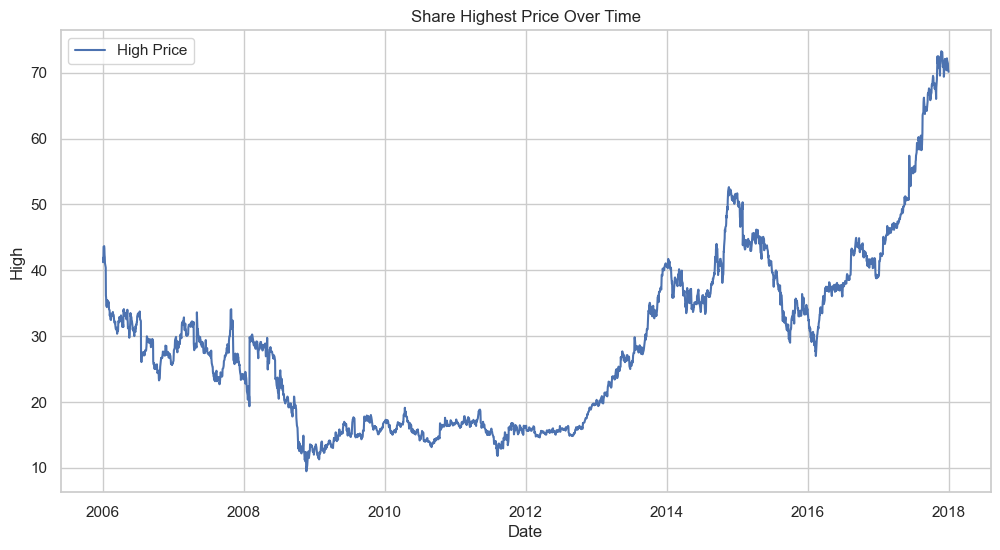

In [5]:
sns.set(style="whitegrid")    #setting style for a clean bg

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Date", y="High", label="High Price")

plt.xlabel("Date")
plt.ylabel("High")
plt.title("Share Highest Price Over Time")

plt.show()

# Resampling

**Resampling** refers to the process of changing the frequency of your time series data. This involves either increasing or decreasing the number of data points in your series.

### Why Resample:
- **Data Alignment:** Sometimes, you might need to combine or compare time series data that have different frequencies.For example, you might have sales data recorded daily and marketing campaign data recorded weekly. 
- **Feature Engineering:** Resampling can help create new features for machine learning models. For instance, you could downsample daily data to wekly averages, which might provide a more stable and less noisy input for your model.

### Types of Resampling:
- **Downsampling**: Reducing the frequency of your data. For example, converting daily data to weekly data. This usually involves aggregating the data (e.g., taking the average, sum, or maximum of the daily values to represent the weekly value).
- **Upsampling**: Increasing the frequency of your data. For example, converting monthly data to weekly data. This often involves interpolating or filling in the missing values between the original data points.

C:\Users\Sahil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sahil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


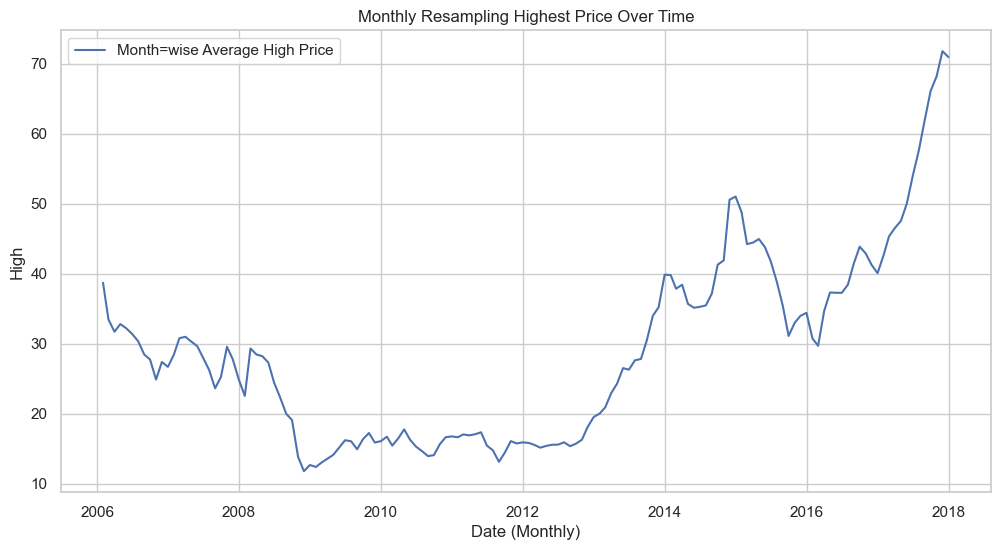

In [6]:
df_resampled = df.resample("ME").mean(numeric_only=True)   #resampling to monthly freq, using mean as aggregate function

sns.set(style="whitegrid")

plt.figure(figsize=(12,6))
sns.lineplot(data=df_resampled, x=df_resampled.index, y="High", label="Month=wise Average High Price")

plt.xlabel('Date (Monthly)')
plt.ylabel('High')
plt.title('Monthly Resampling Highest Price Over Time')

plt.show()

# Detecting Seasonality Using Auto Correlation

Autocorrelation measures the correlation of a time series with itself at different time lags.  Think of it as comparing the time series to a shifted version of itself. 

### How it Detects Seasonality:

Seasonality is a pattern in a time series that repeats at regular intervals (e.g., every year, every month, every week).  If a time series has seasonality, its autocorrelation function will show peaks at the seasonal lags.   

- Example: If you have monthly sales data and there's a yearly seasonal pattern (e.g., sales are always high in December), you'd expect to see a high autocorrelation at lag 12 (12 months).
- **Significant Peaks:** Peaks that extend beyond the confidence intervals (the shaded area around zero) are considered statistically significant. These are the lags where the autocorrelation is strong enough to suggest a real relationship, not just random chance.
- The lag at which you find a significant peak corresponds to the length of the seasonal cycle. Example: If you see a peak at lag 12 in monthly data, it suggests a yearly seasonality.

<Figure size 1200x600 with 0 Axes>

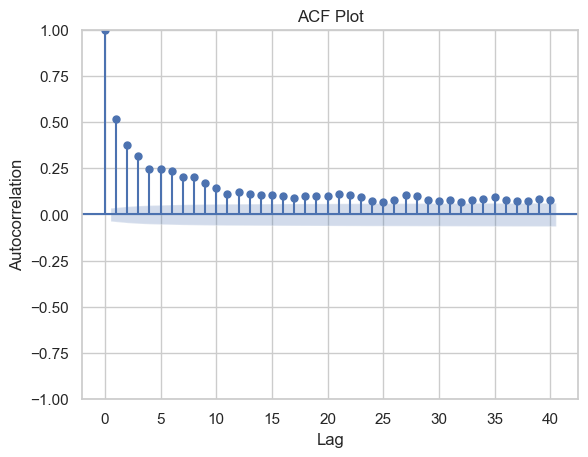

In [7]:
plt.figure(figsize=(12,6))
plot_acf(df["Volume"], lags=40)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("ACF Plot")
plt.show()

# Detecting Stationarity

The Augmented Dickey-Fuller (ADF) test is a statistical test used in time series analysis to determine whether a given time series is stationary or not.

### What the ADF Test Does

The ADF test is a hypothesis test with the following null and alternative hypotheses:

- **Null Hypothesis (H0):** The time series has a unit root, meaning it is non-stationary. A unit root indicates that the series is integrated (e.g., it's a random walk or has a trend).   
- **Alternative Hypothesis (H1):** The time series is stationary (or trend-stationary, or difference-stationary, depending on the specific version of the test).

### Interpreting the Results

The output of the ADF test typically includes:

- **Test Statistic:** The calculated value from the regression.
- **P-value:** The probability of observing the test statistic if the null hypothesis is true. A small p-value (typically less than 0.05) indicates strong evidence against the null hypothesis.   
- **Critical Values:** Thresholds used to determine statistical significance.

If the p-value is small (less than your chosen significance level) or the test statistic is less than the critical value, you reject the null hypothesis and conclude that the series is stationary.



In [9]:
results = adfuller(df["High"])
print("ADF Statistic: ", results[0])
print("p-value: ", results[1])
print("Critical Values: ", results[4])

ADF Statistic:  0.7671404880535945
p-value:  0.9910868050318213
Critical Values:  {'1%': -3.4325316347197403, '5%': -2.862503905260741, '10%': -2.5672831121111113}


- Based on the ADF Statistici.e > all Critical Values, So, we accept the null hypothesis and conclude that the data does not appear to be stationary according to the Augmented Dickey-Fuller test.
- This suggests that differencing or other transformations may be needed to achieve stationarity before applying certain time series models.

# Smoothening the Data using Differencing and Moving Average

Differencing involves subtracting the previous observation from the current observation to remove trends or seasonality.

This differencing operation is commonly used to transform a time series into a new series that represents the changes between consecutive observations.

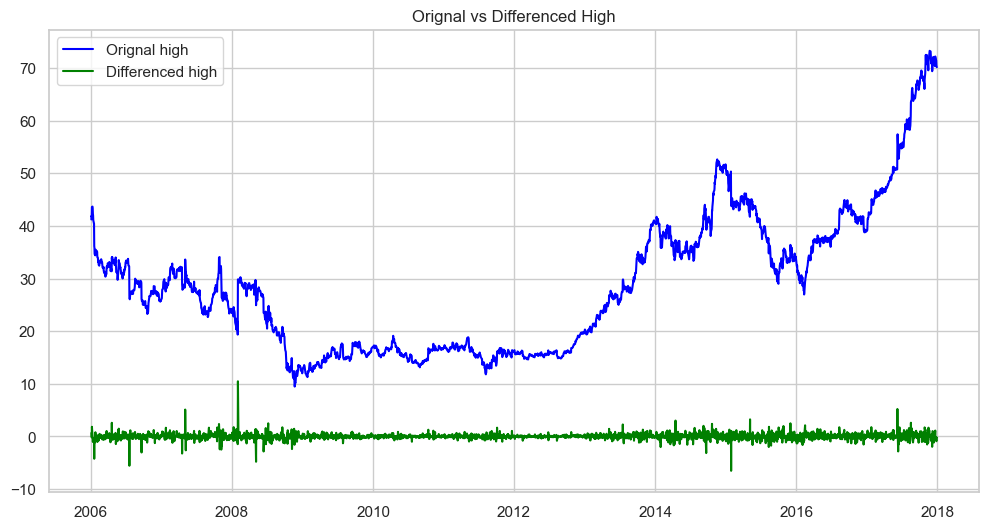

In [12]:
#differencing
df["high_diff"] = df["High"].diff()

#plotting
plt.figure(figsize=(12,6))
plt.plot(df["High"], label="Orignal high", color="blue")
plt.plot(df["high_diff"], label="Differenced high", color="green")
plt.legend()
plt.title("Orignal vs Differenced High")
plt.show()

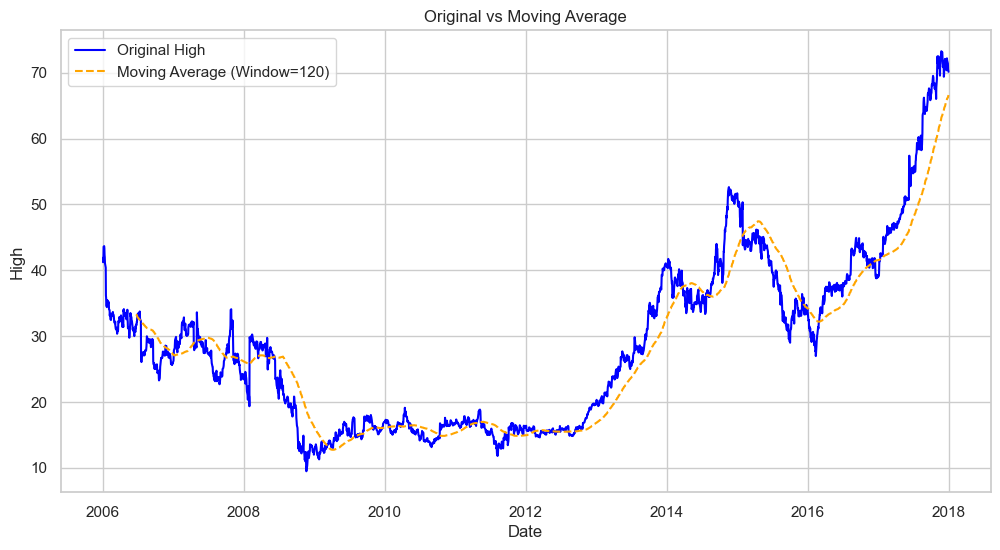

In [13]:
#moving average
window_size = 120
df["high_smoothed"] = df["High"].rolling(window = window_size).mean()

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='orange')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()

# Orignal vs Differenced Data


In [16]:
# Create a df with "High" and "high_diff" cols side by side
df_combined = pd.concat([df["High"], df["high_diff"]], axis=1)
df_combined.head(10)

,High,high_diff
Date,,
2006-01-03,41.22,NaN
2006-01-04,41.90,0.68
2006-01-05,41.73,-0.17
2006-01-06,43.57,1.84
2006-01-09,43.66,0.09
2006-01-10,43.34,-0.32
2006-01-11,42.31,-1.03
2006-01-12,41.99,-0.32
2006-01-13,41.08,-0.91


In [18]:
#drop first row as it has NaN
df_combined.dropna(subset=["high_diff"], inplace=True)
df_combined.head(10)

,High,high_diff
Date,,
2006-01-04,41.90,0.68
2006-01-05,41.73,-0.17
2006-01-06,43.57,1.84
2006-01-09,43.66,0.09
2006-01-10,43.34,-0.32
2006-01-11,42.31,-1.03
2006-01-12,41.99,-0.32
2006-01-13,41.08,-0.91
2006-01-17,40.39,-0.69


In [20]:
result = adfuller(df_combined['high_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -12.148367478343218
p-value: 1.5912766134151093e-22
Critical Values: {'1%': -3.4325316347197403, '5%': -2.862503905260741, '10%': -2.5672831121111113}


- Based on the ADF Statistici.e < all Critical Values, So, we reject the null hypothesis and conclude that we have enough evidence to reject the null hypothesis. The data appear to be stationary according to the Augmented Dickey-Fuller test.
- This suggests that differencing or other transformations may be needed to achieve stationarity before applying certain time series models.